In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
#How many rows and columns are in the dataset?
df.shape



(541909, 8)

In [4]:
# Data types

print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [5]:
#How many missing values are there in each column?

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
#Top 10 most frequent descriptions

df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


In [7]:
#Remove rows with missing CustomerID

df=df.dropna(subset=['CustomerID'])
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
#Remove rows with negative Quantity or UnitPrice

df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [71]:
#Standardize Description column(convert to lowercase and strip spaces).

df['Description'] =df['Description'].str.lower().str.upper()
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Sales,InvoiceMonth,CohortMonth,Revenue
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011-12,2011-08,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011-12,2011-08,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011-12,2011-08,16.60


In [10]:
#Find the top 10 most frequent Description values.

(df['Description'].value_counts().head(10))

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
POSTAGE,1099


In [11]:

#Convert InvoiceDate to datetime
pd.to_datetime(df['InvoiceDate'])

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


# AGGREGATION & SUMMARY

In [30]:
# Total sales per row

df['Total_Sales']=df['Quantity' ] * df['UnitPrice']
df['Total_Sales']

,Total_Sales
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [13]:
#total revenue per country

df.groupby('Country')['Total_Sales'].sum()

,Total_Sales
Country,
Australia,138521.310
Austria,10198.680
Bahrain,548.400
Belgium,41196.340
Brazil,1143.600
Canada,3666.380
Channel Islands,20450.440
Cyprus,13590.380
Czech Republic,826.740


In [14]:
#Find the top 5 customers by total revenue

df.groupby('CustomerID')['Total_Sales'].sum().sort_values(ascending=False).head(5)

,Total_Sales
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [15]:
#Find the average quantity sold per StockCode.

df.groupby('StockCode')['Quantity'].mean()

,Quantity
StockCode,
10002,16.795918
10080,13.857143
10120,6.433333
10123C,1.666667
10124A,3.200000
...,...
C2,1.007519
DOT,1.000000
M,25.257042


In [16]:
#Count how many invoices each customer has.

df.groupby('CustomerID')['InvoiceNo'].count()

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


# Time-Based Analysis

In [31]:
df['Total_Sales']=df['Quantity' ] * df['UnitPrice']
df['Total_Sales']

,Total_Sales
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [73]:
import pandas as pd

df.reset_index(inplace=True)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Total_Sales'] = df['Quantity'] * df['UnitPrice']


df['Month'] = df['InvoiceDate'].dt.month


monthly_revenue = df.groupby('Month')['Total_Sales'].sum()


print(monthly_revenue)


Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: Total_Sales, dtype: float64


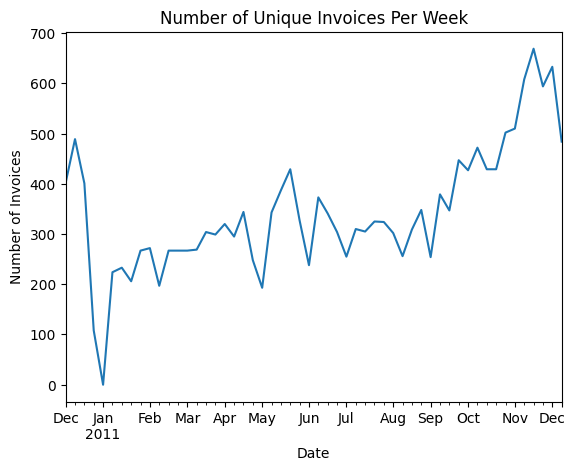

In [67]:
#Plot the number of invoices per week.


df.reset_index(inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
invoices_week = df['InvoiceNo'].resample('W').nunique()

# 4. Plot the results
invoices_week.plot(title='Number of Unique Invoices Per Week')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.show()

In [63]:
 #Busiest day (highest number of invoices)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique().sort_values(ascending=False).head(1)


,InvoiceNo
InvoiceDate,
2010-12-02,137


In [51]:
#First and last purchase date per customer.

customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min','max'])
customer_dates


,min,max
CustomerID,,
12346.0,1/18/2011 10:01,1/18/2011 10:01
12347.0,1/26/2011 14:30,8/2/2011 8:48
12348.0,1/25/2011 10:42,9/25/2011 13:13
12349.0,11/21/2011 9:51,11/21/2011 9:51
12350.0,2/2/2011 16:01,2/2/2011 16:01
...,...,...
18280.0,3/7/2011 9:52,3/7/2011 9:52
18281.0,6/12/2011 10:53,6/12/2011 10:53
18282.0,12/2/2011 11:43,8/5/2011 13:35


In [62]:
# Monthly growth rate of revenue

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

revenue_month = df.groupby('InvoiceMonth')['Revenue'].sum()

revenue_month_pct = revenue_month.pct_change() * 100

print(revenue_month_pct)

InvoiceMonth
2010-12          NaN
2011-01    -0.570765
2011-02   -21.478401
2011-03    33.180724
2011-04   -21.209108
2011-05    44.627885
2011-06    -2.561304
2011-07    -9.244013
2011-08     7.541004
2011-09    47.648158
2011-10     9.076084
2011-11    11.786431
2011-12   -55.398086
Freq: M, Name: Revenue, dtype: float64


# CUSTOMER ANALYSIS

In [49]:
 #Repeat customers

 repeat_customers = df['CustomerID'].value_counts().head(10)
repeat_customers = repeat_customers[repeat_customers > 1]
 repeat_customers

,count
CustomerID,
17841.0,7847
14911.0,5675
14096.0,5111
12748.0,4595
14606.0,2700
15311.0,2379
14646.0,2076
13089.0,1818
13263.0,1677


In [48]:
 #Customers with highest average order value

 avg_order_value = df.groupby('CustomerID')['TotalSales'].mean().sort_values(ascending=False)
 avg_order_value

KeyError: 'Column not found: TotalSales'

In [46]:
 #Products frequently bought together (basic co-occurrence)
 basket = df[df['InvoiceNo'].duplicated(keep=False)]
 (basket.groupby(['InvoiceNo','Description']).size().unstack(fill_value=0).head())

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Correlation between Quantity and UnitPrice
(df[['Quantity','UnitPrice']].corr())

,Quantity,UnitPrice
Quantity,1.000000,-0.004563
UnitPrice,-0.004563,1.000000


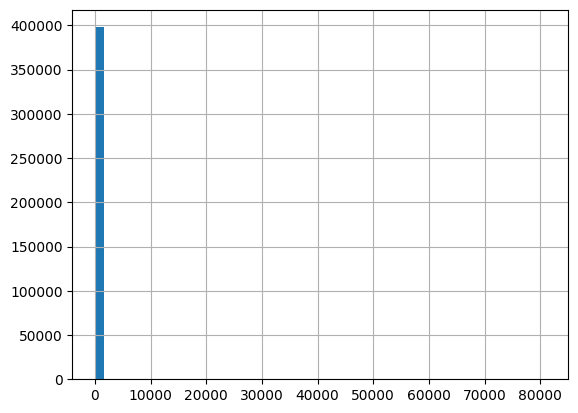

In [27]:
#Histogram of Quantity
df['Quantity'].hist(bins=50)
plt.show()

In [40]:
#Top 10 products by revenue

top_products = df.groupby('Description')['Total_Sales'].sum().sort_values(ascending=False).head(10)
top_products

,Total_Sales
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
MANUAL,53779.93


In [59]:
#Cohort analysis (basic monthly retention)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
cohorts = df.groupby(['CohortMonth', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()

print(cohorts.head())

  CohortMonth InvoiceMonth  CustomerID
0     2010-12      2010-12         885
1     2010-12      2011-01         324
2     2010-12      2011-02         286
3     2010-12      2011-03         340
4     2010-12      2011-04         321
